# 6 - Comparação

Nessa análise, vamos comparar os distritos em relação ao município. Serão comparados o quanto cada distrito compõe o atendimento e a demanda da cidade, e a posição em relação aos outros distritos.

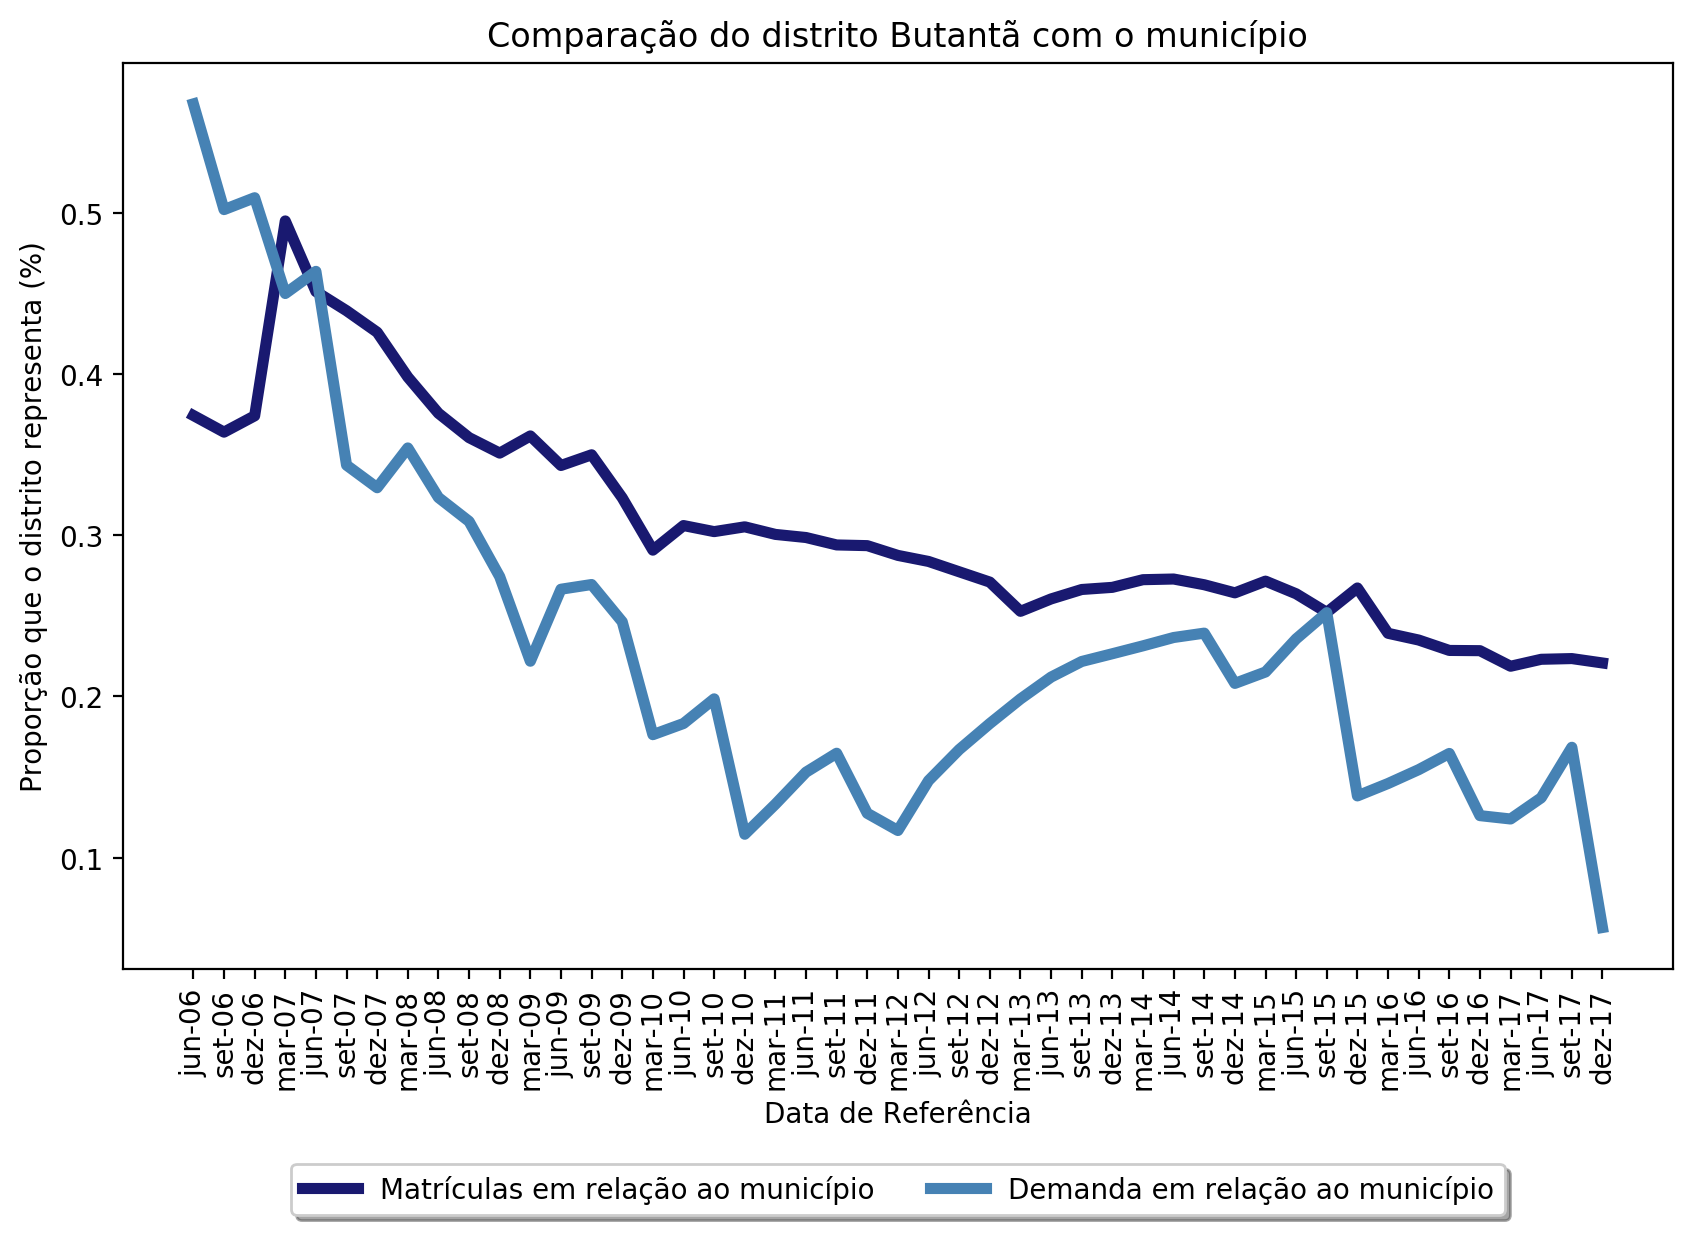

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import imageio
from pylab import rcParams
from matplotlib.pyplot import figure

rcParams['figure.figsize'] = 16, 9
rcParams['figure.dpi'] = 100

dados_educ_pop = pd.read_csv('dados/dados_educ_pop.csv', sep = ',')

dados_matricula = dados_educ_pop.groupby(['MES_ANO_REF'])['MAT_CRECHE'].sum().to_frame()
dados_demanda = dados_educ_pop.groupby(['MES_ANO_REF'])['DEM_CRECHE'].sum().to_frame()
dados_populacao = dados_educ_pop.groupby(['MES_ANO_REF'])['TOTAL'].sum().to_frame()

dados_municipio = dados_matricula.merge(dados_demanda, on = ['MES_ANO_REF'])
dados_municipio = dados_municipio.merge(dados_populacao, on = ['MES_ANO_REF'])

posicao_mat, posicao_dem, matriculas, demanda = [], [], [], []
periodos = dados_educ_pop.MES_ANO_REF.unique()
for periodo in periodos:
    dados = dados_educ_pop[dados_educ_pop['MES_ANO_REF'] == periodo].sort_values(by='MAT_CRECHE', ascending=False).reset_index()
    posicao_mat.append(dados[dados['DISTRITO'] == 'BUTANTA'].index[0] + 1)
    matriculas.append((dados[dados['DISTRITO'] == 'BUTANTA']['MAT_CRECHE'] / dados_municipio.at[periodo, 'MAT_CRECHE']).values[0] * 100)
    dados = dados_educ_pop[dados_educ_pop['MES_ANO_REF'] == periodo].sort_values(by='DEM_CRECHE', ascending=False).reset_index()
    posicao_dem.append(dados[dados['DISTRITO'] == 'BUTANTA'].index[0] + 1)
    demanda.append((dados[dados['DISTRITO'] == 'BUTANTA']['DEM_CRECHE'] / dados_municipio.at[periodo, 'DEM_CRECHE']).values[0] * 100)
    
fig = plt.figure(dpi=200, figsize=(10, 6))
plt.title('Comparação do distrito Butantã com o município')
plt.plot(periodos, matriculas, label='Matrículas em relação ao município', color='midnightblue', linewidth=4.0)
plt.plot(periodos, demanda, label='Demanda em relação ao município', color='steelblue', linewidth=4.0)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2),  shadow=True, ncol=2)
plt.ylabel('Proporção que o distrito representa (%)')
plt.xlabel('Data de Referência')
fig = plt.xticks(rotation=90)

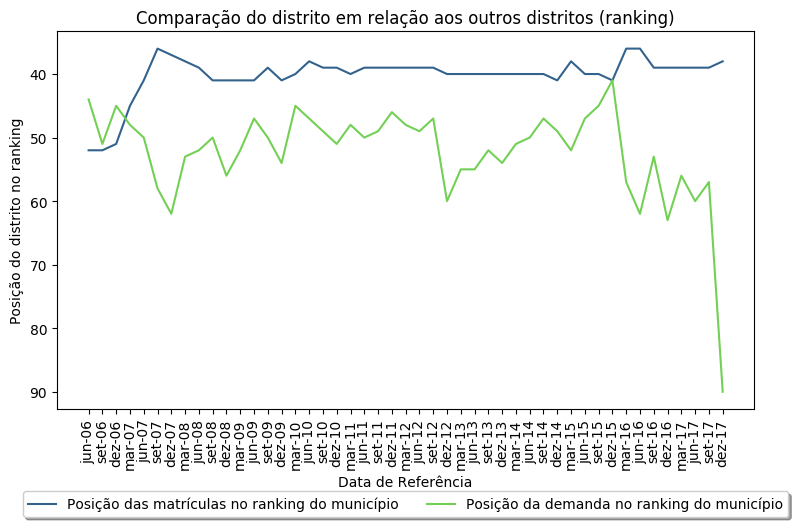

In [47]:
fig = plt.figure(dpi=100, figsize=(9, 5))
plt.title('Comparação do distrito em relação aos outros distritos (ranking)')
plt.plot(periodos, posicao_mat, label='Posição das matrículas no ranking do município', color='#33638D')
plt.plot(periodos, posicao_dem, label='Posição da demanda no ranking do município', color='#73D055')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2),  shadow=True, ncol=2)
plt.ylabel('Posição do distrito no ranking')
plt.xlabel('Data de Referência')
plt.gca().invert_yaxis()
fig = plt.xticks(rotation=90)